<font face="times new roman" size="3" color="black">
    <div align="center">
        <h2>Tecnológico de Monterrey<br>
            Campus Santa Fe<br><br>
            Mathematics and Data Science for Decision Making<br>
            Saúl Juárez Ordóñez (sauljz@tec.mx)<br><br>
            <center>Principal Component Analysis</center>
        </h2>
    </div>
</font>

<img src="matrix3.jpg" alt="Matrix" style="display: block;margin-left:auto;margin-right: auto;width:70%;"/>

<font face="times new roman" size="2" color="blue">
<div align="justify">
<h1> Name and Student id:
</h1>
<h2>Erick Alcalá Robles - A01025213
</br>Emiliano Cabrera Ruiz - A01025453
</br>Andrew Dunkerley Vera - A01025076
</br>Do Hyun Nam - A01025276</h2>     
</div>
</font>

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>In this notebook we study the Principal Component Analysis technique and we will use it to help an anonymous company establish a classification among its collaborators. For that, the organization has provided a data set with several numerical indicators, which we are going to combine and establish the performance of each collaborator.<br><br> First we import all the necessary libraries.</h2>
</div>
</font>

In [1]:
# Linear Algebra
import numpy as np
from numpy.random import randint
import random
import math
import sympy
from sympy import symbols, Eq, solve
# Latex:
sympy.init_printing(use_latex = 'mathjax')
from random import randint

# Data processing
import pandas as pd 

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1>Data Exploration</h1>
<h2>Secondly, we explore tha data set "data_HR.csv" from the human resources department of an anonymous organization.<br><br> <font color="blue">Task: Import the file and call it "df" as in <i>dataframe</i>.</font></h2>
</div>
</font>

In [4]:
df = pd.read_csv('hum_res.csv')
df_drop = df.drop(columns=['Unnamed: 11','Unnamed: 12'])

<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: How many data points and variables do we have?</h2>
</div>
</font>

In [5]:
cols = df_drop.columns.tolist()
size = df_drop.shape
print('This dataset has', size[0], 'rows and',size[1],'columns. The variables are:\n\n ', cols)

This dataset has 14999 rows and 11 columns. The variables are:

  ['id', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary']


<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: Take a sample of size 10.</h2>
</div>
</font>

In [6]:
df_drop.sample(10)

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
11191,c11192,0.47,0.56,4,226,3,0,0,0,marketing,low
7217,c7218,0.41,0.48,3,155,2,1,0,0,technical,medium
3451,c3452,0.72,0.95,4,216,3,0,0,0,sales,low
6691,c6692,0.14,0.72,4,254,4,0,0,0,support,low
8991,c8992,0.75,0.82,5,202,3,1,0,0,IT,low
12225,c12226,0.90,0.97,4,258,5,0,1,0,accounting,low
9472,c9473,0.86,0.86,3,173,3,0,0,0,marketing,low
14054,c14055,0.62,0.61,3,266,2,0,0,0,management,high
13254,c13255,0.61,0.83,4,153,2,0,0,0,technical,low
7844,c7845,0.24,0.65,6,210,5,0,0,0,management,high


<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: How many departments are there in this organization and which are they?</h2>
</div>
</font>

In [18]:
departments = df['department'].unique()
print('There are',departments.size,'different departments.\nThey are', departments,'.')

There are 10 different departments.
They are ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_management' 'marketing' 'RandD'] .


<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: What type of salaries do we have in this dataset?</h2>
</div>
</font>

In [22]:
print('There are',df_drop['salary'].unique(),'salaries.')

There are ['low' 'medium' 'high'] salaries.


<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: Get the descriptive statistics and interpret.</h2>
</div>
</font>

In [23]:
df_drop.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Descriptive statistics interpretation

<font face="times new roman" size="2" color="blue">
<div align="justify">
<h2>Task: Get the correlation and interpret.</h2>
</div>
</font>

In [24]:
df_drop.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Correlation interpretation

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>Let's visualize the correlation between variables with a heat map:</h2>
</div>
</font>

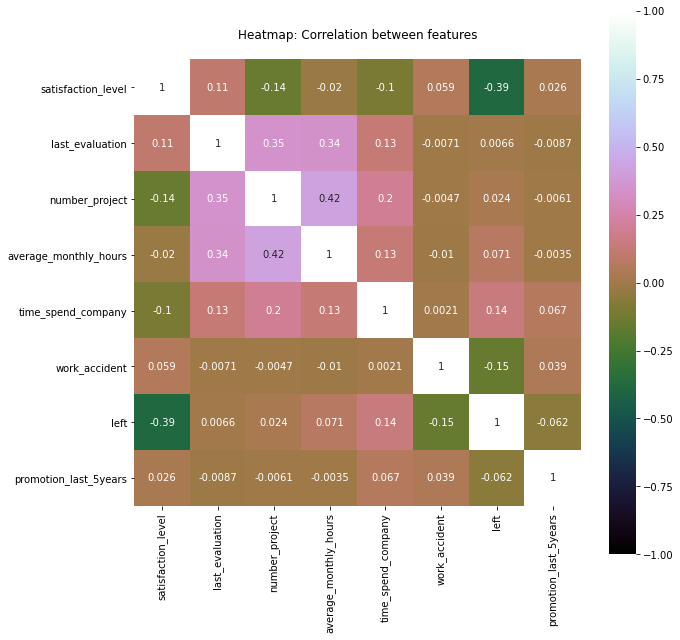

In [26]:
correlation = df_drop.corr()
f1 = plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, vmin=-1, square=True,annot=True,cmap='cubehelix')

plt.title('Heatmap: Correlation between features\n')
f1.savefig('heatmap.png')

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1>Principal Component Analysis</h1>
</div>
</font>

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>Let's drop the non-numerical features "id", "department" and "salary".</h2>
</div>
</font>

In [28]:
df_drop_num = df_drop.drop(labels=['id', 'department','salary'],axis=1)
df_drop_num.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>Let's also rename the values of the column "left" since it is a label, say "Yes" for "1" and "No" for "0", and move it to the beginning.</h2>
</div>
</font>

In [29]:
df_drop_num['left'].replace(0, 'No',inplace=True)
df_drop_num['left'].replace(1, 'Yes',inplace=True)

cols_d = df_drop_num.columns.tolist()
cols_d.insert(0, cols_d.pop(cols_d.index('left')))
df_drop_num = df_drop_num.reindex(columns = cols_d)

df_drop_num

,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
0,Yes,0.38,0.53,2,157,3,0,0
1,Yes,0.80,0.86,5,262,6,0,0
2,Yes,0.11,0.88,7,272,4,0,0
3,Yes,0.72,0.87,5,223,5,0,0
4,Yes,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...,...
14994,Yes,0.40,0.57,2,151,3,0,0
14995,Yes,0.37,0.48,2,160,3,0,0
14996,Yes,0.37,0.53,2,143,3,0,0
14997,Yes,0.11,0.96,6,280,4,0,0


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>Now we extract all features in an array except "left" since it is not numerical.</h2>
</div>
</font>

In [30]:
X = df_drop_num.iloc[:,1:8].values
X

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1> Standardization</h1>
<h2>Not all the variables have the same units of measurement. Standardization is a variable scaling method with which we can obtain approximately normally distributed data with mean $0$ and standard deviation $1$. For each feature, we substract the mean to each observation and then we divide by the satndard deviation: $$ $$ $$z = \frac{x-\mu}{\sigma}$$ We apply this to our numerical array $X$: </h2>
</div>
</font>

In [31]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ...,  1.71343614,
        -0.41116529, -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ...,  0.34365527,
        -0.41116529, -0.14741182],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ...,  0.34365527,
        -0.41116529, -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.34123516,
        -0.41116529, -0.14741182]])

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> And with the satndardized data we can construct the covariance matrix:</h2>
</div>
</font>

In [32]:
cov_mat = np.cov(X_std.T)
cov_mat


array([[ 1.00006668,  0.10502822, -0.14297912, -0.02004945, -0.1008728 ,
         0.05870115,  0.02560689],
       [ 0.10502822,  1.00006668,  0.34935588,  0.33976445,  0.1315995 ,
        -0.00710476, -0.00868435],
       [-0.14297912,  0.34935588,  1.00006668,  0.41723845,  0.19679901,
        -0.00474086, -0.00606436],
       [-0.02004945,  0.33976445,  0.41723845,  1.00006668,  0.12776343,
        -0.01014356, -0.00354465],
       [-0.1008728 ,  0.1315995 ,  0.19679901,  0.12776343,  1.00006668,
         0.00212056,  0.06743742],
       [ 0.05870115, -0.00710476, -0.00474086, -0.01014356,  0.00212056,
         1.00006668,  0.03924805],
       [ 0.02560689, -0.00868435, -0.00606436, -0.00354465,  0.06743742,
         0.03924805,  1.00006668]])

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> We can also construct the correlation  matrix from the non-standardized data $X$:</h2>
</div>
</font>

In [38]:
corr_mat = np.corrcoef(X.T)
corr_mat

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724,  0.02560519],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429, -0.00868377],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055, -0.00606396],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289, -0.00354441],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.06743293],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        ,  0.03924543],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0.06743293,
         0.03924543,  1.        ]])

In [39]:
corr_mat_df = pd.DataFrame(corr_mat)
corr_mat_df

,0,1,2,3,4,5,6
0,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
1,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
2,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
3,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
4,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
5,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
6,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> We can also construct the correlation matrix from the standardized data $X$_std:</h2>
</div>
</font>

In [35]:
corr_mat_st = np.corrcoef(X_std.T)
corr_mat_st

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724,  0.02560519],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429, -0.00868377],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055, -0.00606396],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289, -0.00354441],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.06743293],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        ,  0.03924543],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0.06743293,
         0.03924543,  1.        ]])

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> Now we find the eigenvectors and eigenvalues of the covariance matrix</h2>
</div>
</font>

In [36]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors: \n\n%s' %eig_vecs)
print('\n Eigenvalues: \n\n%s' %eig_vals)

Eigenvectors: 

[[-0.08797699 -0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [ 0.50695734  0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [ 0.5788351  -0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [ 0.54901653  0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [ 0.31354922  0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [-0.01930249  0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [ 0.00996933  0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

 Eigenvalues: 

[1.83017431 0.54823098 0.63363587 0.84548166 1.12659606 0.95598647
 1.06036136]


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> Note that the sum of the eigenvalues equals the number of eigenvectors:</h2>
</div>
</font>

In [37]:
np.sum(eig_vals)

7.000466728897174

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1> Principal Components</h1>
<h2>In order to decide which eigenvectors to keep and not lose too much information, we must observe the eigenvalues, the smaller ones carry within less information about the distribution of the data and therefore they can be cast aside.
</h2>
</div>
</font>

In [40]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# ordering eigenpairs in ascending order
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Valores propios:/n')
for i in eig_pairs:
    print(i[0],i[1])

Valores propios:/n
1.8301743138754762 [-0.08797699  0.50695734  0.5788351   0.54901653  0.31354922 -0.01930249
  0.00996933]
1.1265960639915622 [ 0.79752505  0.33180877 -0.10338032  0.10388959 -0.28404472  0.37489883
  0.10557298]
1.0603613622840902 [-0.09438973 -0.13499526 -0.02293518 -0.10714981  0.42547869  0.45245222
  0.75836313]
0.9559864740066455 [ 0.26786864  0.1101505  -0.10336241 -0.01034922  0.04036861 -0.8048393
  0.50589173]
0.8454816637143475 [ 0.33637135  0.07393548 -0.19677589 -0.25170987  0.78782241 -0.05762997
 -0.39411153]
0.6336358744830209 [ 0.27784886 -0.70780994 -0.00657105  0.63497294  0.12200054 -0.03622859
 -0.04873036]
0.5482309765420313 [-0.29189921  0.30996609 -0.77736008  0.45787675  0.05287224  0.04433104
  0.00391698]


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> For example, the first component has a moderate positive association with "last_evaluation",	"number_project"	and "average_montly_hours", with $0.50695734,  0.5788351$ and $ 0.54901653$, respectively. The second component is strongly and positively related with "satisfaction_level" ($0.79$).
</h2>
</div>
</font>

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1> Explained variance</h1>
<h2> The explained variance of a component tells us how much information (variance) can be attributed to this component. This is calculated by dividing the corresponding eigenvalue by the total sum of the eigenvalues. As a percentage, it is given by: 
</h2>
</div>
</font>

In [41]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp

[26.143604201712918, 16.093156465426723, 15.147009525908214, 13.65603910465620
9, 12.077504207316494, 9.051337561072039, 7.831348933907403]

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> For example, the variance explained by the first three components is: 
</h2>
</div>
</font>

In [42]:
sum_var = var_exp[0]+var_exp[1]+var_exp[2]
sum_var

57.38377019304785

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> Let's visualize the individual explained variance:</h2>
</div>
</font>

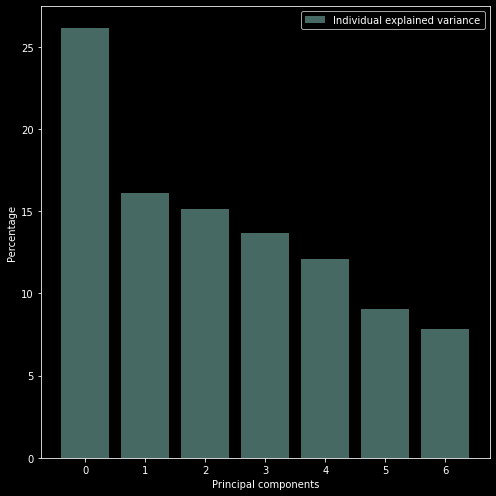

In [43]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(7, 7))

    plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.ylabel('Percentage')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> We can observe that the maximum variation of $26.14\%$ can be explained by the first component and we can get rid of the last component since its explained variance is of $7.83\%$.</h2>
</div>
</font>

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> Now the accumulated variance</h2>
</div>
</font>

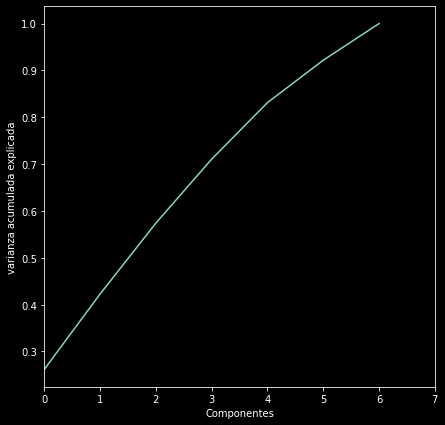

In [44]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
with plt.style.context('dark_background'):
    plt.figure(figsize=(7, 7))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlim(0,7,1)
    plt.xlabel('Componentes')
    plt.ylabel('varianza acumulada explicada')

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>The graph shows that above $90\%$ of the variance is explained by the first six variables. Now we visualize our observations in a subspace of dimension $2$:</h2>
</div>
</font>

In [46]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [47]:
df_pca = pd.DataFrame(data = Y_sklearn, columns = ['Componente Principal 1', 'Componente Principal 2'])
df_pca

,Componente Principal 1,Componente Principal 2
0,-1.900350,-1.120831
1,2.135832,0.249337
2,3.058916,-1.683127
3,1.550277,0.125511
4,-1.904444,-1.168134
...,...,...
14994,-1.854913,-0.991615
14995,-2.011924,-1.243596
14996,-2.050716,-1.182032
14997,2.914185,-1.427526


<Figure size 432x288 with 0 Axes>

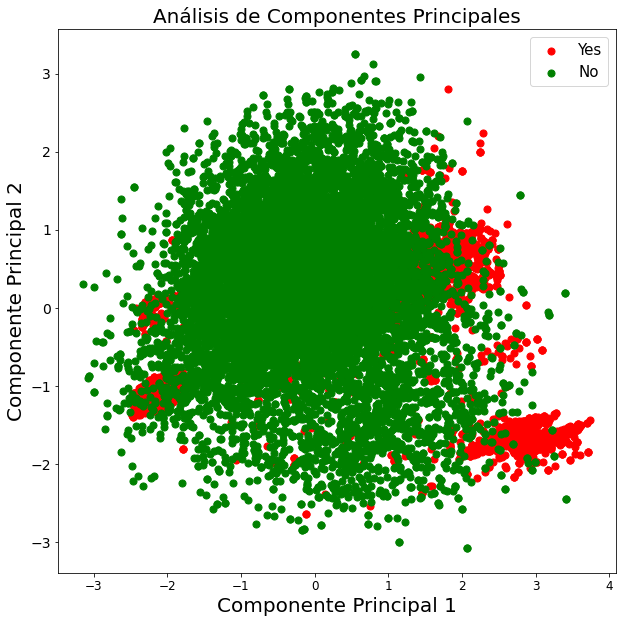

In [49]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente Principal 1',fontsize=20)
plt.ylabel('Componente Principal 2',fontsize=20)
plt.title("Análisis de Componentes Principales",fontsize=20)
targets = ['Yes', 'No']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_drop_num['left'] == target
    plt.scatter(df_pca.loc[indicesToKeep, 'Componente Principal 1'], 
                df_pca.loc[indicesToKeep, 'Componente Principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

<font face="times new roman" size="2" color="black">
<div align="justify">
<h1> Projection matrix</h1>
<h2>The projection matrix is the matrix formed with the eigenvectors that have the greatest eigenvalues.</h2>
</div>
</font>

In [50]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.08797699  0.79752505]
 [ 0.50695734  0.33180877]
 [ 0.5788351  -0.10338032]
 [ 0.54901653  0.10388959]
 [ 0.31354922 -0.28404472]
 [-0.01930249  0.37489883]
 [ 0.00996933  0.10557298]]


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>By multiplying the standardized matrix by the projection matrix we transform our data into a new space of variables.</h2>
</div>
</font>

In [51]:
Y = X_std.dot(matrix_w)
Y

array([[-1.90035018, -1.12083103],
       [ 2.1358322 ,  0.2493369 ],
       [ 3.05891625, -1.68312693],
       ...,
       [-2.0507165 , -1.182032  ],
       [ 2.91418496, -1.42752606],
       [-1.91543672, -1.17021407]])

<font face="times new roman" size="2" color="black">
<div align="justify">
<h2>Finally, we use the first principal component to assign a score to each collaborator and we merge the score column to the data set and we order it by scores.</h2>
</div>
</font>

In [53]:
Z = X_std.dot(eig_vecs.T[0])
Z_df = pd.DataFrame(Z)
Z_df.columns = ['score']
Z_df
S = pd.merge(df_drop,Z_df, right_index=True, left_index=True)
S.sort_values(by=['score'], ascending=False)

,id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,score
809,c810,0.11,0.97,7,310,4,0,1,0,support,medium,3.743223
340,c341,0.09,0.89,7,308,5,0,1,0,hr,medium,3.706114
14551,c14552,0.09,0.89,7,308,5,0,1,0,hr,medium,3.706114
12340,c12341,0.09,0.89,7,308,5,0,1,0,hr,medium,3.706114
14876,c14877,0.10,0.97,7,306,4,0,1,0,marketing,low,3.702789
...,...,...,...,...,...,...,...,...,...,...,...,...
10817,c10818,0.52,0.38,2,103,3,0,0,0,support,medium,-2.987798
12888,c12889,0.52,0.37,2,118,2,0,0,0,product_management,high,-3.067265
10677,c10678,0.52,0.37,2,118,2,0,0,0,product_management,high,-3.067265
10197,c10198,0.50,0.40,2,108,2,0,0,0,technical,medium,-3.081265


<font face="times new roman" size="2" color="black">
<div align="justify">
<h2> Therefore, the top 5 collaborators are c810, c341, c14552, c12341 and c14877. Congratulations!</h2>
</div>
</font>